<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from scipy.spatial import Voronoi, voronoi_plot_2d, ConvexHull, convex_hull_plot_2d

mpl.rcParams['figure.figsize'] = (14,7)

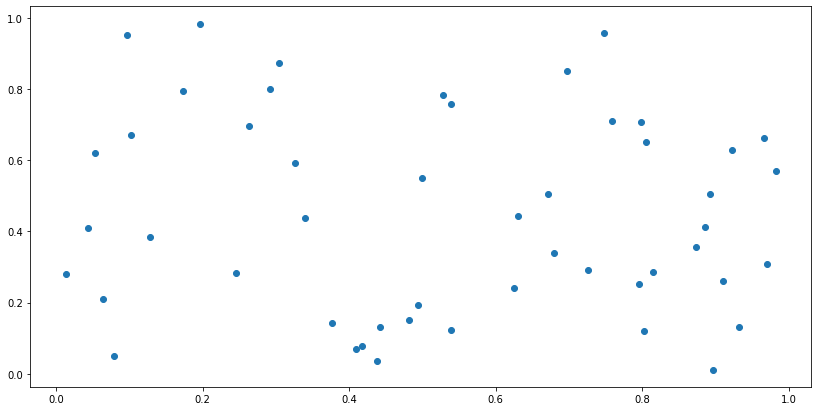

In [ ]:
puntos = np.random.rand(50,2)        
# puntos
plt.scatter(puntos[:,0], puntos[:,1])

In [ ]:
### Create Voronoi object
vor = Voronoi(puntos)
print(puntos.shape)

(50, 2)


In [ ]:
### Get Voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices.shape)

(87, 2)


In [ ]:
### Get Voronoi regions
vor_regions = vor.regions
print(vor_regions)

[[7, 0, 5], [10, -1, 1, 9], [16, 0, 7, -1, 15], [20, 16, 0, 5, 6, 4, 19], [22, 15, 16, 20], [22, 15, -1, 2, 17, 18, 21], [28, 26, 25, 24, 27], [26, 6, 4, 3, 13, 12, 25], [28, -1, 7, 5, 6, 26], [28, -1, 1, 27], [], [33, 29, 31, 30, 32], [33, 9, 10, 11, 29], [31, 14, 8, 11, 29], [32, 24, 25, 12, 30], [33, 9, 1, 27, 24, 32], [37, 35, 34, 36], [37, 17, 18, 35], [42, 3, 13, 23, 40], [49, 46, 45, 44, 47, 48], [48, -1, 38, 39, 47], [51, 36, 37, 17, 2, 50], [60, 55, 56, 54, 53, 57, 58, 59], [54, 43, 41, 40, 42, 53], [57, 19, 4, 3, 42, 53], [60, 52, 55], [58, 21, 22, 20, 19, 57], [59, 34, 35, 18, 21, 58], [60, 52, 51, 36, 34, 59], [62, -1, 10, 11, 8, 61], [65, 23, 13, 12, 30, 31, 14, 63], [64, 61, 8, 14, 63], [68, -1, 62, 66], [68, -1, 48, 49, 67], [70, 43, 41, 45, 44, 69], [75, 73, 72, 74], [74, 69, 44, 47, 39, 72], [75, 71, 70, 69, 74], [81, 77, 76, 78, 79, 80], [78, 50, 51, 52, 55, 56, 76], [77, 71, 70, 43, 54, 56, 76], [81, 73, 75, 71, 77], [79, -1, 2, 50, 78], [80, 38, -1, 79], [81, 73, 72

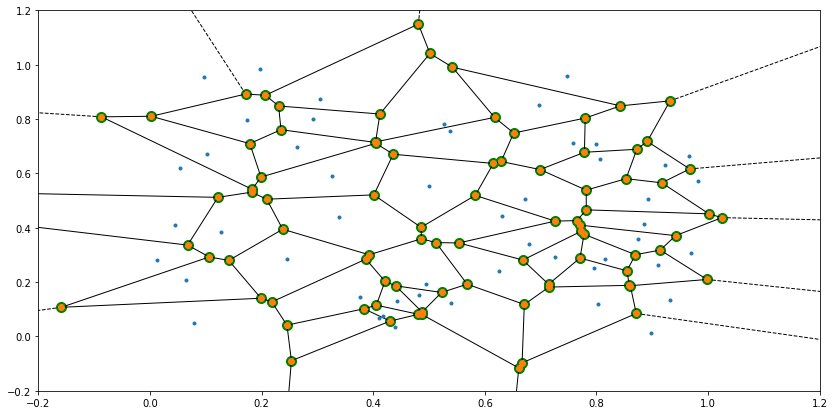

In [ ]:
### Use built-in function to plot 
voronoi_plot_2d(vor)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], color="green", s=100)
plt.xlim([-0.2,1.2]); plt.ylim([-0.2,1.2])
plt.show()

Ahora continuamos al definir las fronteras de nuestra superficie. Como queremos que se asemeje a una estructura acinar, simulamos un medio círculo interior y exterior.

:\begin{align}
    \alpha(r, \theta) = r,\qquad\ \theta\in{\{0, \pi\}},\quad  r=\{1, 2\}
\end{align}

\begin{align}
    x &= r\cos\theta,\quad &y &= r\sin\theta\\
    \Rightarrow r &= \sqrt{x^2+y^2},\quad &\theta &= \arctan\left(\frac{y}{x}\right)
\end{align}

In [ ]:
### parámetros
theta = np.linspace(0, np.pi, 500);
r = np.array([1.0, 2.0]);

### funciones
alpha_x = lambda r, theta: r*np.cos(theta);
alpha_y = lambda r, theta: r*np.sin(theta);

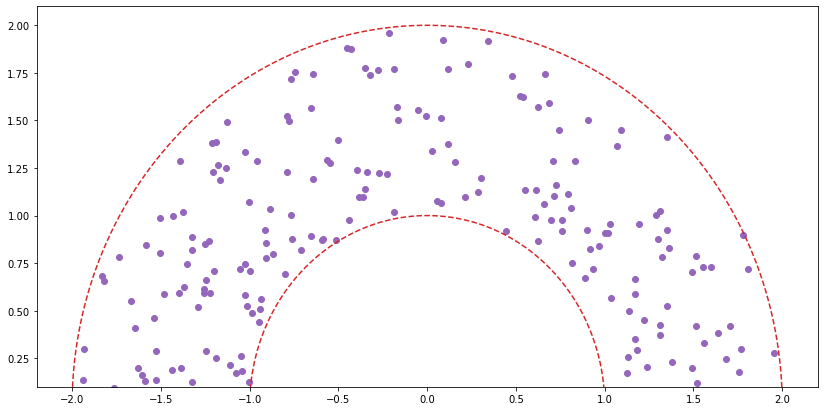

In [ ]:
N = 200;

X, Y = [], []
for i in range(len(r)):
    X.append(alpha_x(r[i], theta))
    Y.append(alpha_y(r[i], theta))

X = np.array(X).flatten()
Y = np.array(Y).flatten()
pts = np.array([X, Y]).T

r_rand     = np.random.rand(N) * abs(r[-1]-r[0]) + r[0]
theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X, Y, "--", color="tab:red"); plt.ylim([0.1,2.1])
plt.show()

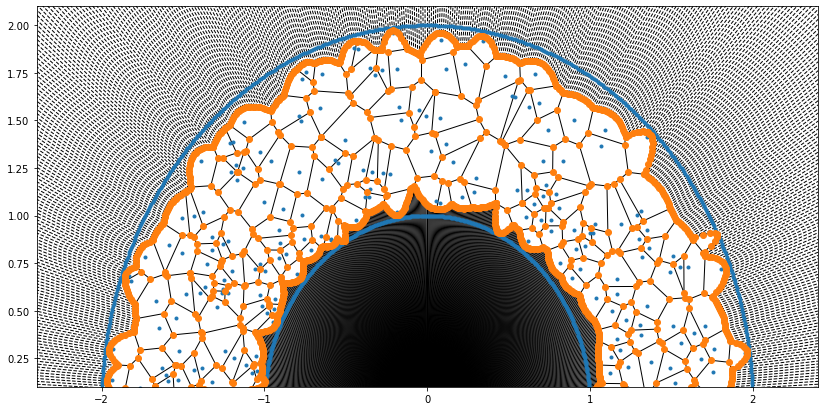

<Figure size 1080x504 with 0 Axes>

In [ ]:
total = np.concatenate((pts, pts_rand))
vor = Voronoi(total)
vor_vertices = vor.vertices

voronoi_plot_2d(vor)
plt.ylim([0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()

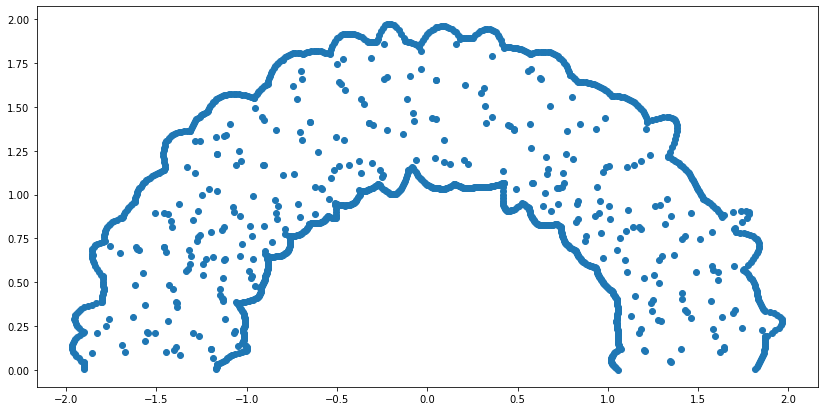

In [ ]:
vor_vertices = vor_vertices[np.where(vor_vertices[:,1] >= 0)]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) >=r[0])]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) <=r[1])]
hull = ConvexHull(vor_vertices)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1])
# vor_vertices
# print(len(vor_vertices))
# print(len(np.where(vor_vertices[:,1] <= 0)[0]))